In [197]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import OneHotEncoder, TargetEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score

In [8]:
gbc = GradientBoostingClassifier()

In [12]:
df = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Cases\\Wisconsin\\BreastCancer.csv")
y = df.Class
X = df.drop('Class', axis = 1)

In [20]:
gcv = GridSearchCV(gbc, param_grid = {'n_estimators': [10, 50] , 'max_depth': [2, 3, 4] , 'learning_rate': np.linspace(0.001, 1, 5)}, verbose = 3, cv = StratifiedKFold(n_splits = 5, shuffle = True))  `

In [22]:
gcv.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.657 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.657 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.657 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.650 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.655 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.657 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.657 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.657 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.650 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.6

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             verbose=3)

In [24]:
gcv.best_params_, gcv.best_score_

({'learning_rate': 0.5005, 'max_depth': 4, 'n_estimators': 50},
 0.9670709146968142)

# `xgboost` Boosting
- y must be encoded
- 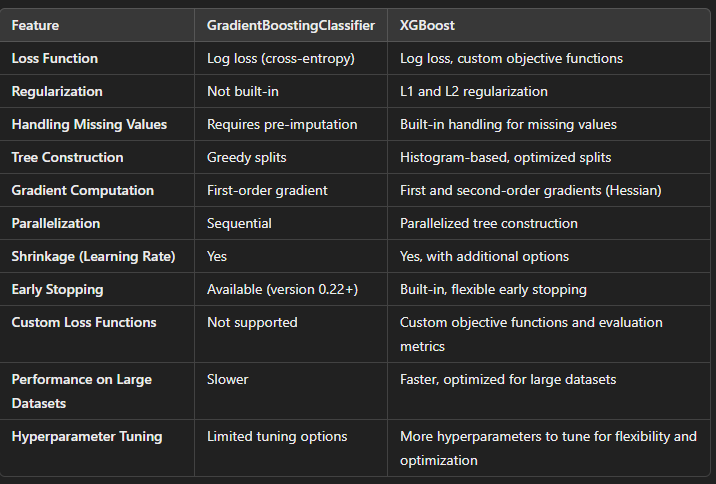

In [27]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB 6.1 MB/s eta 0:00:21
   ---------------------------------------- 0.7/124.9 MB 9.2 MB/s eta 0:00:14
    --------------------------------------- 1.6/124.9 MB 12.9 MB/s eta 0:00:10
    --------------------------------------- 2.9/124.9 MB 16.8 MB/s eta 0:00:08
   - -------------------------------------- 4.7/124.9 MB 21.6 MB/s eta 0:00:06
   -- ------------------------------------- 7.0/124.9 MB 26.4 MB/s eta 0:00:05
   --- ------------------------------------ 9.7/124.9 MB 31.0 MB/s eta 0:00:04
   --- ------------------------------------ 11.9/124.9 MB 46.7 MB/s eta 0:00:03
   ----- ---------------------------------- 15.9/124.9 MB 59.5 MB/s eta 0:00:02
   ------ --------------------------------- 19.2/124.9 MB 65.2 MB/s eta 0:00:02
   ------- -------------------------------- 23.5/124.9 MB 93.9 MB/s eta 0:00:02
   -------- ------------------------------- 27.6/124.9 MB 

In [29]:
import xgboost as xg
#from xgboost import XGBClassifier

In [47]:
le = LabelEncoder()
y= le.fit_transform(y)
le.classes_

array(['Benign', 'Malignant'], dtype=object)

In [49]:
dict(zip(list(np.unique(y)), le.classes_))

{0: 'Benign', 1: 'Malignant'}

In [53]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=24, test_size=0.3 )

In [73]:
xgbm = xg.XGBClassifier(random_state=24)
xgbm.fit(X_train, y_train)
y_pred= xgbm.predict(X_test)

In [75]:
kfold= StratifiedKFold(n_splits= 5, shuffle= True, random_state=24)
params= {'n_estimators':[10,50],'max_depth':[2,3,4], 'learning_rate':np.linspace(0.001,1,5)}
gcv=GridSearchCV(xgbm, param_grid= params, cv= kfold, scoring= 'roc_auc', verbose=3)
gcv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.961 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.941 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.954 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.952 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.937 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.961 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.943 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.962 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.952 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.9

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=24, ...),
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='roc_auc', verbose=3)

In [77]:
gcv.best_params_, gcv.best_score_

({'learning_rate': 0.25075, 'max_depth': 3, 'n_estimators': 50},
 0.9907659175710417)

# Light GBM boosting

In [82]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 2.2 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.4 MB 3.8 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [84]:
from lightgbm import LGBMClassifier

In [102]:
lgbm = LGBMClassifier(random_state=24)
kfold= StratifiedKFold(n_splits= 5, shuffle= True, random_state=24)
params= {'n_estimators':[10,50],'max_depth':[2,3,4], 'learning_rate':np.linspace(0.001,1,5)}
gcv=GridSearchCV(lgbm, param_grid= params, cv= kfold, scoring= 'roc_auc', verbose=3)
gcv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 193, number of negative: 366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345259 -> initscore=-0.639943
[LightGBM] [Info] Start training from score -0.639943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=LGBMClassifier(random_state=24),
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='roc_auc', verbose=3)

In [106]:
gcv.best_score_, gcv.best_params_

(0.9919254455246026,
 {'learning_rate': 0.75025, 'max_depth': 2, 'n_estimators': 50})

# `catboost`

In [98]:
from catboost import CatBoostClassifier

In [108]:
cb = CatBoostClassifier(random_state=24)
kfold= StratifiedKFold(n_splits= 5, shuffle= True, random_state=24)
params= {'n_estimators':[10,50],'max_depth':[2,3,4], 'learning_rate':np.linspace(0.001,1,5)}
gcv=GridSearchCV(cb, param_grid= params, cv= kfold, scoring= 'roc_auc', verbose=3)
gcv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0:	learn: 0.6923956	total: 142ms	remaining: 1.28s
1:	learn: 0.6916562	total: 144ms	remaining: 574ms
2:	learn: 0.6909673	total: 145ms	remaining: 338ms
3:	learn: 0.6902951	total: 146ms	remaining: 219ms
4:	learn: 0.6895459	total: 147ms	remaining: 147ms
5:	learn: 0.6888030	total: 148ms	remaining: 98.8ms
6:	learn: 0.6881069	total: 149ms	remaining: 64ms
7:	learn: 0.6873658	total: 150ms	remaining: 37.6ms
8:	learn: 0.6867035	total: 152ms	remaining: 16.8ms
9:	learn: 0.6860019	total: 153ms	remaining: 0us
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.994 total time=   0.1s
0:	learn: 0.6923950	total: 619us	remaining: 5.57ms
1:	learn: 0.6916103	total: 1.21ms	remaining: 4.85ms
2:	learn: 0.6908533	total: 1.72ms	remaining: 4.02ms
3:	learn: 0.6901149	total: 2.24ms	remaining: 3.35ms
4:	learn: 0.6893710	total: 2.73ms	remaining: 2.73ms
5:	learn: 0.6886321	total: 3.24ms	remaining: 2.16ms
6:	learn: 0.6878782	total: 3.75

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x0000019CDFE295B0>,
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='roc_auc', verbose=3)

In [110]:
gcv.best_score_, gcv.best_params_

(0.9931205888351518,
 {'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 10})

### using `cat_features` parameter 
- dont have to do encoding

In [113]:
from catboost import CatBoostClassifier

In [121]:
hr= pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Cases\\human-resources-analytics\\HR_comma_sep.csv")

In [123]:
X=hr.drop('left',axis=1)
y=hr['left']
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=24, test_size=0.3 )

In [126]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14995 entries, 0 to 14994
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14995 non-null  float64
 1   last_evaluation        14995 non-null  float64
 2   number_project         14995 non-null  int64  
 3   average_montly_hours   14995 non-null  int64  
 4   time_spend_company     14995 non-null  int64  
 5   Work_accident          14995 non-null  int64  
 6   left                   14995 non-null  int64  
 7   promotion_last_5years  14995 non-null  int64  
 8   Department             14995 non-null  object 
 9   salary                 14995 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [125]:
## it does not need OHE , iternally it also does not do hot encoding
cgbm = CatBoostClassifier(random_state = 24, cat_features=['Department', 'salary'])
cgbm.fit(X_train,y_train)

Learning rate set to 0.028113
0:	learn: 0.6522419	total: 72.9ms	remaining: 1m 12s
1:	learn: 0.6120282	total: 117ms	remaining: 58.3s
2:	learn: 0.5737969	total: 159ms	remaining: 52.8s
3:	learn: 0.5368228	total: 200ms	remaining: 49.8s
4:	learn: 0.5053458	total: 241ms	remaining: 47.9s
5:	learn: 0.4740359	total: 282ms	remaining: 46.7s
6:	learn: 0.4483940	total: 334ms	remaining: 47.3s
7:	learn: 0.4215709	total: 380ms	remaining: 47.1s
8:	learn: 0.3997738	total: 426ms	remaining: 46.9s
9:	learn: 0.3795379	total: 474ms	remaining: 46.9s
10:	learn: 0.3594362	total: 516ms	remaining: 46.4s
11:	learn: 0.3414402	total: 557ms	remaining: 45.9s
12:	learn: 0.3253036	total: 601ms	remaining: 45.6s
13:	learn: 0.3108883	total: 642ms	remaining: 45.2s
14:	learn: 0.2961824	total: 689ms	remaining: 45.2s
15:	learn: 0.2826359	total: 735ms	remaining: 45.2s
16:	learn: 0.2709140	total: 777ms	remaining: 44.9s
17:	learn: 0.2607601	total: 820ms	remaining: 44.7s
18:	learn: 0.2500294	total: 863ms	remaining: 44.6s
19:	learn

In [142]:
y_pred= cgbm.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9784396532562791


In [136]:
#The hyperparameter - num_boost_round gives output with different learning rate, here with 50 different learning rate
cgbm = CatBoostClassifier(random_state = 24, cat_features=['Department', 'salary'],num_boost_round=50)
cgbm.fit(X_train,y_train)

Learning rate set to 0.438486
0:	learn: 0.4148505	total: 36.2ms	remaining: 1.77s
1:	learn: 0.2890293	total: 76.3ms	remaining: 1.83s
2:	learn: 0.2154412	total: 106ms	remaining: 1.66s
3:	learn: 0.1806313	total: 145ms	remaining: 1.67s
4:	learn: 0.1566314	total: 183ms	remaining: 1.65s
5:	learn: 0.1397710	total: 227ms	remaining: 1.66s
6:	learn: 0.1287857	total: 262ms	remaining: 1.61s
7:	learn: 0.1229525	total: 295ms	remaining: 1.55s
8:	learn: 0.1149076	total: 329ms	remaining: 1.5s
9:	learn: 0.1100037	total: 371ms	remaining: 1.49s
10:	learn: 0.1064082	total: 407ms	remaining: 1.44s
11:	learn: 0.1033467	total: 453ms	remaining: 1.44s
12:	learn: 0.1003454	total: 500ms	remaining: 1.42s
13:	learn: 0.0980293	total: 544ms	remaining: 1.4s
14:	learn: 0.0951370	total: 583ms	remaining: 1.36s
15:	learn: 0.0939028	total: 626ms	remaining: 1.33s
16:	learn: 0.0930101	total: 661ms	remaining: 1.28s
17:	learn: 0.0913152	total: 711ms	remaining: 1.26s
18:	learn: 0.0888701	total: 742ms	remaining: 1.21s
19:	learn: 

In [144]:
y_pred= cgbm.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9784396532562791


#### GridSearchCV

In [177]:
cgbm = CatBoostClassifier(random_state = 24, cat_features=['Department', 'salary'])

kfold= StratifiedKFold(n_splits=5, shuffle= True, random_state=24)
params= {'n_estimators':[10,50],'max_depth':[2,3,4], 'learning_rate':np.linspace(0.001,1,5)}
gcv=GridSearchCV(cgbm, param_grid=params, cv=kfold, scoring='roc_auc', verbose=3)
gcv.fit(X,y)
0

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0:	learn: 0.6925472	total: 14.3ms	remaining: 129ms
1:	learn: 0.6919348	total: 33.7ms	remaining: 135ms
2:	learn: 0.6913254	total: 47.3ms	remaining: 110ms
3:	learn: 0.6907172	total: 56.2ms	remaining: 84.3ms
4:	learn: 0.6901085	total: 65.8ms	remaining: 65.8ms
5:	learn: 0.6895010	total: 77.5ms	remaining: 51.7ms
6:	learn: 0.6888947	total: 91.8ms	remaining: 39.3ms
7:	learn: 0.6882913	total: 106ms	remaining: 26.5ms
8:	learn: 0.6876875	total: 121ms	remaining: 13.5ms
9:	learn: 0.6870981	total: 134ms	remaining: 0us
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.911 total time=   0.1s
0:	learn: 0.6925453	total: 13.3ms	remaining: 120ms
1:	learn: 0.6919295	total: 31ms	remaining: 124ms
2:	learn: 0.6913171	total: 45.8ms	remaining: 107ms
3:	learn: 0.6907059	total: 55ms	remaining: 82.5ms
4:	learn: 0.6900937	total: 63.5ms	remaining: 63.5ms
5:	learn: 0.6894828	total: 75.7ms	remaining: 50.5ms
6:	learn: 0.6888731	total:

0

In [178]:
gcv.best_score_, gcv.best_params_

(0.9893002633546979,
 {'learning_rate': 1.0, 'max_depth': 4, 'n_estimators': 50})

### Medical Cost Expenses dataset

In [187]:
from catboost import CatBoostRegressor

In [189]:
ins= pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Cases\\Medical Cost Personal\\insurance.csv")

In [191]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [193]:
X=ins.drop('charges', axis=1)
y=ins['charges']
cgbr= CatBoostRegressor(random_state=24, cat_features= ['sex', 'region','smoker'])

In [201]:
kfold= KFold(n_splits=5, shuffle= True, random_state=24)
params= {'n_estimators':[10,50],'max_depth':[2,3,4], 'learning_rate':np.linspace(0.001,1,5)}
gcv=GridSearchCV(cgbr, param_grid=params, cv=kfold, scoring='r2', verbose=3)
gcv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0:	learn: 12036.2666510	total: 6.51ms	remaining: 58.6ms
1:	learn: 12027.5885074	total: 12.6ms	remaining: 50.5ms
2:	learn: 12018.7579696	total: 25.1ms	remaining: 58.6ms
3:	learn: 12010.0080421	total: 38.5ms	remaining: 57.7ms
4:	learn: 12001.6612206	total: 48.5ms	remaining: 48.5ms
5:	learn: 11992.8131380	total: 54.2ms	remaining: 36.1ms
6:	learn: 11984.5229977	total: 63ms	remaining: 27ms
7:	learn: 11975.9771850	total: 71.4ms	remaining: 17.9ms
8:	learn: 11967.4506001	total: 79.5ms	remaining: 8.84ms
9:	learn: 11958.6367854	total: 87.5ms	remaining: 0us
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.014 total time=   0.0s
0:	learn: 12050.3139519	total: 8.63ms	remaining: 77.7ms
1:	learn: 12041.5605243	total: 13.9ms	remaining: 55.7ms
2:	learn: 12032.6556923	total: 22.3ms	remaining: 52.1ms
3:	learn: 12023.9006792	total: 30.3ms	remaining: 45.5ms
4:	learn: 12015.5102852	total: 38.4ms	remaining: 38.4ms
5:	learn:

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x0000019CE1A52900>,
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             scoring='r2', verbose=3)

In [202]:
gcv.best_score_, gcv.best_params_

(0.8584148378430502,
 {'learning_rate': 0.5005, 'max_depth': 2, 'n_estimators': 50})

## on differernt dataset

In [227]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597) 
  
# data (as pandas dataframes) 
X = productivity_prediction_of_garment_employees.data.features 
y = productivity_prediction_of_garment_employees.data.targets 



In [231]:
X.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
dtype: int64

In [225]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   actual_productivity  1197 non-null   float64
dtypes: float64(1)
memory usage: 9.5 KB


In [215]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 131.1+ 

In [233]:
X.dropna(inplace = True)

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_4744\25841689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace = True)


In [235]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 1191
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   691 non-null    object 
 1   quarter                691 non-null    object 
 2   department             691 non-null    object 
 3   day                    691 non-null    object 
 4   team                   691 non-null    int64  
 5   targeted_productivity  691 non-null    float64
 6   smv                    691 non-null    float64
 7   wip                    691 non-null    float64
 8   over_time              691 non-null    int64  
 9   incentive              691 non-null    int64  
 10  idle_time              691 non-null    float64
 11  idle_men               691 non-null    int64  
 12  no_of_style_change     691 non-null    int64  
 13  no_of_workers          691 non-null    float64
dtypes: float64(5), int64(5), object(4)
memory usage: 81.0+ KB


In [347]:
X.drop(["date", "day"], axis =1, inplace = True)

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_4744\190421027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["date", "day"], axis =1, inplace = True)


In [384]:
X.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,Quarter1,sweing,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0
2,Quarter1,sweing,11,0.8,11.41,968.0,3660,50,0.0,0,0,30.5
3,Quarter1,sweing,12,0.8,11.41,968.0,3660,50,0.0,0,0,30.5
4,Quarter1,sweing,6,0.8,25.90,1170.0,1920,50,0.0,0,0,56.0
5,Quarter1,sweing,7,0.8,25.90,984.0,6720,38,0.0,0,0,56.0


In [351]:
y = y.loc[X.index]

In [353]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline

In [363]:
ctbr = CatBoostRegressor(cat_features = ['quarter', 'department'])
xgbr = XGBRegressor()
lgbr = LGBMRegressor()

In [365]:
ohe = OneHotEncoder(handle_unknown = 'ignore')
ct = make_column_transformer(('passthrough', make_column_selector(dtype_exclude = object)), (ohe, make_column_selector(dtype_include = object)))

In [367]:
pipe_c = Pipeline([('CT', ct), ('XG', xgbr)])
pipe_l = Pipeline([('CT', ct), ('LT', lgbr)])

In [405]:
params = {'XG__n_estimators':[10,50],'XG__max_depth':[2,3,4], 'XG__learning_rate':np.linspace(0.001,1,5)}
kfold= KFold(n_splits=5, shuffle= True, random_state=24)

In [407]:
gcv1 = GridSearchCV(pipe_c, cv = kfold, param_grid = params, verbose = 3, scoring = 'r2')
gcv1.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=-0.008 total time=   0.0s
[CV 2/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=-0.014 total time=   0.0s
[CV 3/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=-0.014 total time=   0.0s
[CV 4/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=0.009 total time=   0.0s
[CV 5/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=-0.003 total time=   0.0s
[CV 1/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=50;, score=0.041 total time=   0.0s
[CV 2/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=50;, score=0.043 total time=   0.0s
[CV 3/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=50;, score=0.033 total time=   0.0s
[CV 4/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimator

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE48E7320>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_sel...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'XG__learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'XG__max_depth': [2, 3, 4],
                         'XG__n_estimators': [10, 50]},
             scoring='r2', verbose=3)

In [409]:
gcv1.best_params_, gcv1.best_score_

({'XG__learning_rate': 0.25075, 'XG__max_depth': 2, 'XG__n_estimators': 50},
 0.8146439075469971)

In [373]:
params = {'LT__n_estimators':[10,50],'LT__max_depth':[2,3,4], 'LT__learning_rate':np.linspace(0.001,1,5)}
gcv2 = GridSearchCV(pipe_l, cv = kfold, param_grid = params, verbose = 3)
gcv2.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 12
[LightGBM] [Info] Start training from score 0.726682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 553, number of used features: 12
[LightGBM] [Info] Start training from score 0.717681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[CV 2/5] END LT__learning_rate=0.001, LT__max_depth=4, LT__n_estimators=50;, score=0.050 total time=   0.0s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 553, number of used features: 13
[LightGBM] [Info] Start training from score 0.727497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 2/5] END LT__learning_rate=0.25075, LT__max_depth=2, LT__n_estimators=50;, score=0.676 total time=   0.0s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 553, number of used features: 13
[LightGBM] [Info] Start training from score 0.727497
[LightGBM] [Warning] No fu

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 553, number of used features: 12
[LightGBM] [Info] Start training from score 0.717681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 553, number of used features: 12
[LightGBM] [Info] Start training from score 0.717681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[CV 5/5] END LT__learning_rate=0.5005, LT__max_depth=4, LT__n_estimators=10;, score=0.808 total time=   0.0s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 12
[LightGBM] [Info] Start training from score 0.726682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 553, number of used features: 12
[LightGBM] [Info] Start training from score 0.718089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 12
[LightGBM] [Info] Start training from score 0.726682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 5/5] END LT__learning_rate=0.75025, LT__max_depth=4, LT__n_estimators=10;, score=0.770 total time=   0.0s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 12
[LightGBM] [Info] Start training from score 0.726682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 553, number of used features: 12
[LightGBM] [Info] Start training from score 0.718089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 12
[LightGBM] [Info] Start training from score 0.726682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 12
[LightGBM] [Info] Start training from score 0.726682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE48E7320>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE1B83020>)])),
                                       ('LT', LGBMRegressor())]),
             param_grid={'LT__learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'LT__max_depth': [2, 3, 4],
                         'LT__n_estimators': [10, 50]},
             verbose=3)

In [374]:
gcv2.best_params_, gcv2.best_score_

({'LT__learning_rate': 0.5005, 'LT__max_depth': 4, 'LT__n_estimators': 10},
 0.7776738825921279)

In [375]:
params = {'n_estimators':[10,50],'max_depth':[2,3,4], 'learning_rate':np.linspace(0.001,1,5)}
gcv3 = GridSearchCV(ctbr, cv = kfold, param_grid = params, verbose = 3)

In [376]:
gcv3.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0:	learn: 0.1523062	total: 5.86ms	remaining: 52.7ms
1:	learn: 0.1522311	total: 15.4ms	remaining: 61.5ms
2:	learn: 0.1521412	total: 20.7ms	remaining: 48.4ms
3:	learn: 0.1520581	total: 29.8ms	remaining: 44.8ms
4:	learn: 0.1519771	total: 34.6ms	remaining: 34.6ms
5:	learn: 0.1518905	total: 43.2ms	remaining: 28.8ms
6:	learn: 0.1518046	total: 52.5ms	remaining: 22.5ms
7:	learn: 0.1517254	total: 61.2ms	remaining: 15.3ms
8:	learn: 0.1516399	total: 69.8ms	remaining: 7.75ms
9:	learn: 0.1515536	total: 79.1ms	remaining: 0us
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=-0.010 total time=   0.0s
0:	learn: 0.1602522	total: 6.28ms	remaining: 56.5ms
1:	learn: 0.1601597	total: 16ms	remaining: 63.9ms
2:	learn: 0.1600711	total: 24.9ms	remaining: 58.2ms
3:	learn: 0.1599730	total: 37.2ms	remaining: 55.7ms
4:	learn: 0.1598822	total: 54.9ms	remaining: 54.9ms
5:	learn: 0.1597903	total: 67.8ms	remaining: 45.2ms
6:	learn: 0.15

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x0000019CE5ADFC20>,
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             verbose=3)

In [377]:
gcv3.best_params_, gcv3.best_score_

({'learning_rate': 0.25075, 'max_depth': 3, 'n_estimators': 50},
 0.8100300989811977)

#### VOTING
- using voting regressor

In [393]:
from sklearn.ensemble import VotingRegressor

In [424]:
params = {
    'XGB__XG__n_estimators': [10, 50],
    'XGB__XG__max_depth': [2, 3, 4],
    'XGB__XG__learning_rate': np.linspace(0.001, 1, 5),
    'LGB__LT__n_estimators': [10, 50],
    'LGB__LT__max_depth': [2, 3, 4],
    'LGB__LT__learning_rate': np.linspace(0.001, 1, 5),
    'CTB__n_estimators': [10, 50],
    'CTB__max_depth': [2, 3, 4],
    'CTB__learning_rate': np.linspace(0.001, 1, 5)
}

In [426]:
voting_regressor = VotingRegressor(
    estimators=[('XG', pipe_c), ('LGB', pipe_l), ('CTB', ctbr)]
)

In [427]:
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
gcv = GridSearchCV(voting_regressor, param_grid=params, cv=kfold, verbose=3, scoring='r2')
gcv.fit(X,y)

Fitting 5 folds for each of 27000 candidates, totalling 135000 fits


ValueError: Invalid parameter 'XGB' for estimator VotingRegressor(estimators=[('XG',
                             Pipeline(steps=[('CT',
                                              ColumnTransformer(transformers=[('passthrough',
                                                                               'passthrough',
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE7F397C0>),
                                                                              ('onehotencoder',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE7F38050>)])),
                                             ('...
                                              ColumnTransformer(transformers=[('passthrough',
                                                                               'passthrough',
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE7F38440>),
                                                                              ('onehotencoder',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE7F31880>)])),
                                             ('LT', LGBMRegressor())])),
                            ('CTB',
                             <catboost.core.CatBoostRegressor object at 0x0000019CE7F3A1B0>)]). Valid parameters are: ['estimators', 'n_jobs', 'verbose', 'weights'].

#### Uusing median

In [434]:
from sklearn.impute import SimpleImputer

In [441]:
si = SimpleImputer(strategy = 'median')

In [443]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597) 
  
# data (as pandas dataframes) 
X = productivity_prediction_of_garment_employees.data.features 
y = productivity_prediction_of_garment_employees.data.targets 



In [453]:
X.drop(["date", "day"], axis = 1, inplace = True)

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_4744\4124121740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["date", "day"], axis = 1, inplace = True)


In [458]:
X[['wip']] = si.fit_transform(X[['wip']])

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_4744\830139267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['wip']] = si.fit_transform(X[['wip']])


In [460]:
X.isna().sum()

quarter                  0
department               0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
dtype: int64

In [464]:
params = {'XG__n_estimators':[10,50],'XG__max_depth':[2,3,4], 'XG__learning_rate':np.linspace(0.001,1,5)}
kfold= KFold(n_splits=5, shuffle= True, random_state=24)
gcv1 = GridSearchCV(pipe_c, cv = kfold, param_grid = params, verbose = 3, scoring = 'r2')
gcv1.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=0.005 total time=   0.0s
[CV 2/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=-0.006 total time=   0.0s
[CV 3/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=0.004 total time=   0.0s
[CV 4/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=-0.002 total time=   0.0s
[CV 5/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=0.003 total time=   0.0s
[CV 1/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=50;, score=0.025 total time=   0.0s
[CV 2/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=50;, score=0.010 total time=   0.0s
[CV 3/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=50;, score=0.024 total time=   0.0s
[CV 4/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE48E7320>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_sel...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'XG__learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'XG__max_depth': [2, 3, 4],
                         'XG__n_estimators': [10, 50]},
             scoring='r2', verbose=3)

In [466]:
gcv1.best_score_

0.5171406865119934

#### droppin wip

In [471]:
X.drop('wip', axis = 1, inplace = True)

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_4744\2545878096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('wip', axis = 1, inplace = True)


In [473]:
params = {'XG__n_estimators':[10,50],'XG__max_depth':[2,3,4], 'XG__learning_rate':np.linspace(0.001,1,5)}
kfold= KFold(n_splits=5, shuffle= True, random_state=24)
gcv1 = GridSearchCV(pipe_c, cv = kfold, param_grid = params, verbose = 3, scoring = 'r2')
gcv1.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=0.005 total time=   0.0s
[CV 2/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=-0.006 total time=   0.0s
[CV 3/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=0.004 total time=   0.0s
[CV 4/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=-0.002 total time=   0.0s
[CV 5/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=10;, score=0.003 total time=   0.0s
[CV 1/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=50;, score=0.025 total time=   0.0s
[CV 2/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=50;, score=0.010 total time=   0.0s
[CV 3/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=50;, score=0.024 total time=   0.0s
[CV 4/5] END XG__learning_rate=0.001, XG__max_depth=2, XG__n_estimators=

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE48E7320>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_sel...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'XG__learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'XG__max_depth': [2, 3, 4],
                         'XG__n_estimators': [10, 50]},
             scoring='r2', verbose=3)

In [475]:
gcv1.best_params_, gcv1.best_score_

({'XG__learning_rate': 0.25075, 'XG__max_depth': 4, 'XG__n_estimators': 50},
 0.5089852094650269)

- using lightgbm

In [478]:
params = {'LT__n_estimators':[10,50],'LT__max_depth':[2,3,4], 'LT__learning_rate':np.linspace(0.001,1,5)}
gcv2 = GridSearchCV(pipe_l, cv = kfold, param_grid = params, verbose = 3)
gcv2.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 957, number of used features: 14
[LightGBM] [Info] Start training from score 0.735678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 3/5] END LT__learning_rate=0.001, LT__max_depth=3, LT__n_estimators=50;, score=0.035 total time=

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 958, number of used features: 14
[LightGBM] [Info] Start training from score 0.737910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 958, number of used features: 14
[LightGBM] [Info] Start training from score 0.737910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[CV 3/5] END LT__learning_rate=0.25075, LT__max_depth=4, LT__n_estimators=10;, score=0.475 total time=   0.0s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 958, number of used features: 14
[LightGBM] [Info] Start training from score 0.737910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 957, number of used features: 14
[LightGBM] [Info] Start training from score 0.731576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 957, number of used features: 14
[LightGBM] [Info] Start training from score 0.735678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END LT__learning_rate=0.5005, LT__max_depth=3, LT__n_estimators=50;, score=0.547 total time=   0.0s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 242
[LightGBM] [Info] Number of data points in the train set: 958, number of used features: 14
[LightGBM] [Info] Start training from score 0.734297
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 958, number of used features: 14
[LightGBM] [Info] Start training from score 0.735991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END LT__learning_rate=0.75025, LT__max_depth=3, LT__n_estimators=10;, score=0.524 total time=   0.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 242
[LightGBM] [Info] Number of data points in the train set: 958, number of used features: 14
[LightGBM] [Info] Start training from score 0.734297
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 957, number of used features: 14
[LightGBM] [Info] Start training from score 0.735678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Info] Start training from score 0.737910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[CV 2/5] END LT__learning_rate=1.0, LT__max_depth=2, LT__n_estimators=50;, score=0.399 total time=   0.0s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 958, number of used features: 14
[LightGBM] [Info] Start training from score 0.735991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[CV 2/5] END LT__learning_rate=1.0, LT__max_depth=3, LT__n_estimators=50;, score=0.348 total time=   0.0s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 958, number of used features: 14
[LightGBM] [Info] Start training from score 0.735991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5] END LT__learning

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE48E7320>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE1B83020>)])),
                                       ('LT', LGBMRegressor())]),
             param_grid={'LT__learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'LT__max_depth': [2, 3, 4],
                         'LT__n_estimators': [10, 50]},
             verbose=3)

In [480]:
gcv2.best_score_, gcv2.best_params_

(0.5058005055834086,
 {'LT__learning_rate': 0.25075, 'LT__max_depth': 4, 'LT__n_estimators': 50})

- using catboost

In [485]:
params = {'n_estimators':[10,50],'max_depth':[2,3,4], 'learning_rate':np.linspace(0.001,1,5)}
gcv3 = GridSearchCV(ctbr, cv = kfold, param_grid = params, verbose = 3)
gcv3.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0:	learn: 0.1734876	total: 8.74ms	remaining: 78.6ms
1:	learn: 0.1734564	total: 16.6ms	remaining: 66.4ms
2:	learn: 0.1734268	total: 28ms	remaining: 65.3ms
3:	learn: 0.1733972	total: 39.9ms	remaining: 59.8ms
4:	learn: 0.1733668	total: 50.1ms	remaining: 50.1ms
5:	learn: 0.1733360	total: 68ms	remaining: 45.3ms
6:	learn: 0.1733030	total: 77.9ms	remaining: 33.4ms
7:	learn: 0.1732730	total: 94.3ms	remaining: 23.6ms
8:	learn: 0.1732423	total: 108ms	remaining: 12ms
9:	learn: 0.1732111	total: 116ms	remaining: 0us
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=10;, score=0.004 total time=   0.1s
0:	learn: 0.1743350	total: 5.52ms	remaining: 49.7ms
1:	learn: 0.1743015	total: 11.6ms	remaining: 46.5ms
2:	learn: 0.1742690	total: 21.1ms	remaining: 49.1ms
3:	learn: 0.1742329	total: 35.1ms	remaining: 52.6ms
4:	learn: 0.1741949	total: 52.6ms	remaining: 52.6ms
5:	learn: 0.1741621	total: 67.3ms	remaining: 44.8ms
6:	learn: 0.1741240	t

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x0000019CE5ADFC20>,
             param_grid={'learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'max_depth': [2, 3, 4], 'n_estimators': [10, 50]},
             verbose=3)

In [490]:
gcv3.best_score_, gcv3.best_params_

(0.5063960394826506,
 {'learning_rate': 0.5005, 'max_depth': 4, 'n_estimators': 50})

- using catboost with ohe

In [492]:
ctb = CatBoostRegressor(verbose = False, random_state = 24)
pipe_cat = Pipeline([('CT', ct), ('CTB', ctb)])
params = {'CTB__n_estimators':[10,50],'CTB__max_depth':[2,3,4], 'CTB__learning_rate':np.linspace(0.001,1,5)}


In [496]:
gcv3 = GridSearchCV(pipe_cat, cv = kfold, param_grid = params, verbose = 3)
gcv3.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END CTB__learning_rate=0.001, CTB__max_depth=2, CTB__n_estimators=10;, score=0.004 total time=   0.0s
[CV 2/5] END CTB__learning_rate=0.001, CTB__max_depth=2, CTB__n_estimators=10;, score=-0.007 total time=   0.0s
[CV 3/5] END CTB__learning_rate=0.001, CTB__max_depth=2, CTB__n_estimators=10;, score=0.003 total time=   0.0s
[CV 4/5] END CTB__learning_rate=0.001, CTB__max_depth=2, CTB__n_estimators=10;, score=-0.003 total time=   0.0s
[CV 5/5] END CTB__learning_rate=0.001, CTB__max_depth=2, CTB__n_estimators=10;, score=0.003 total time=   0.0s
[CV 1/5] END CTB__learning_rate=0.001, CTB__max_depth=2, CTB__n_estimators=50;, score=0.020 total time=   0.0s
[CV 2/5] END CTB__learning_rate=0.001, CTB__max_depth=2, CTB__n_estimators=50;, score=0.007 total time=   0.0s
[CV 3/5] END CTB__learning_rate=0.001, CTB__max_depth=2, CTB__n_estimators=50;, score=0.017 total time=   0.0s
[CV 4/5] END CTB__learning_rate=0.001, CTB__max_

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE48E7320>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019CE1B83020>)])),
                                       ('CTB',
                                        <catboost.core.CatBoostRegressor object at 0x0000019CE7F21A30>)]),
             param_grid={'CTB__learning_rate': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'CTB__max_depth': [2, 3, 4],
                         'CTB__n_estimators': [10, 50]},
             verbose=3)

In [500]:
gcv3.best_score_, gcv3.best_params_

(0.49896158578789845,
 {'CTB__learning_rate': 0.75025, 'CTB__max_depth': 2, 'CTB__n_estimators': 50})